In [2]:
#importing liraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Sales Data.csv', encoding= 'unicode_escape')
#to avoiding encoding error use - unicode_escape

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,ï»¿User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
#rename column name
df.rename(columns={'ï»¿User_ID': 'User_ID'}, inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#drop blanck column
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [9]:
#check null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
#drop null values
df.dropna(inplace= True)

In [11]:
#change datatype
df['Amount'] = df['Amount'].astype('int')

In [12]:
#check datatype
df['Amount'].dtypes

dtype('int64')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
#to get a quick statistical summary of a dataframe
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
#to get a quick statistical summary of a dataset of specific columns
df[['Orders','Amount']].describe()

,Orders,Amount
count,11239.000000,11239.000000
mean,2.489634,9453.610553
std,1.114967,5222.355168
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12675.000000
max,4.000000,23952.000000


# Explortory Data Analysis



### Gender


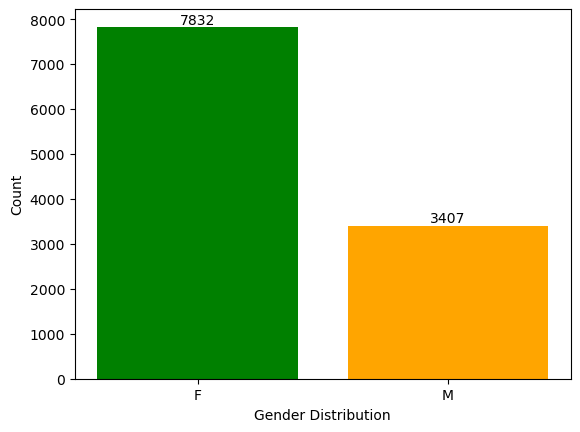

In [26]:
gender_count=df['Gender'].value_counts()
fig,ax= plt.subplots()
colors= ['green','orange']
bars = ax.bar(
    gender_count.index,
    gender_count.values, color=colors
)
ax.bar_label(bars)

ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_xlabel('Gender Distribution')

plt.show()
    
    

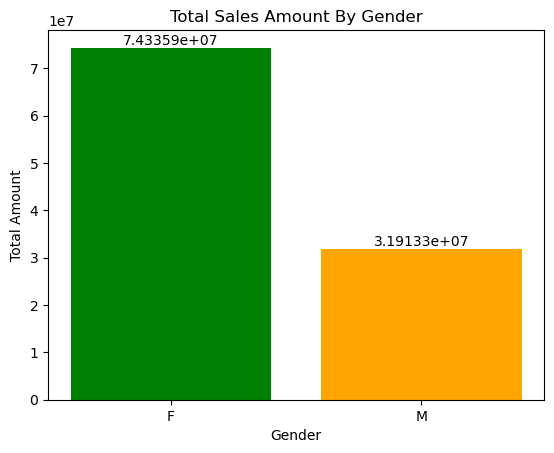

In [24]:
sales_gen= (df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False))
fig,ax = plt.subplots()
colors= ['green','orange']
bars = ax.bar(
    sales_gen['Gender'],
    sales_gen['Amount'],color=colors
)

ax.bar_label(bars)

ax.set_xlabel('Gender')
ax.set_ylabel('Total Amount')
ax.set_title('Total Sales Amount By Gender')

plt.show()


#### From the avove ghraph we can say that most of the buyers are female and even purchasing power of females are greater than men

### Age

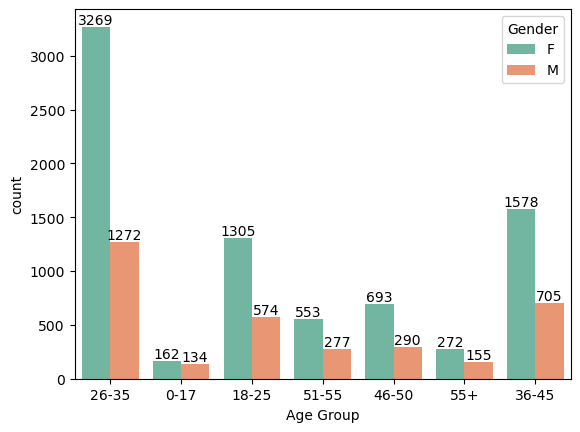

In [36]:
ax = sns.countplot(data= df ,x = 'Age Group',hue= 'Gender',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

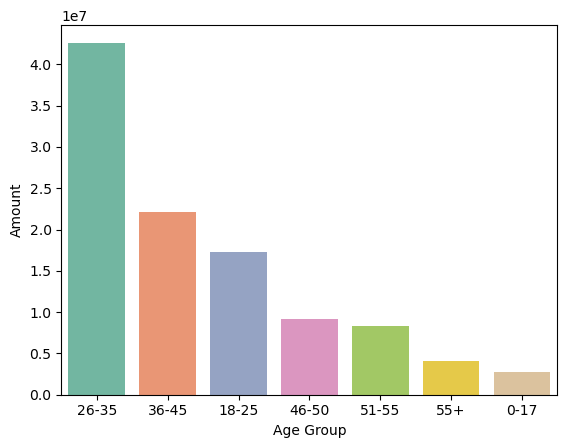

In [39]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'],as_index= False)['Amount'].sum().sort_values(by= 'Amount' ,ascending= False)
sns.barplot(x = 'Age Group', y= 'Amount', data= sales_age, hue='Age Group',palette='Set2')
plt.show()

#### From the above graph we can say that most of buyers are age group of 26-35 years females

## State

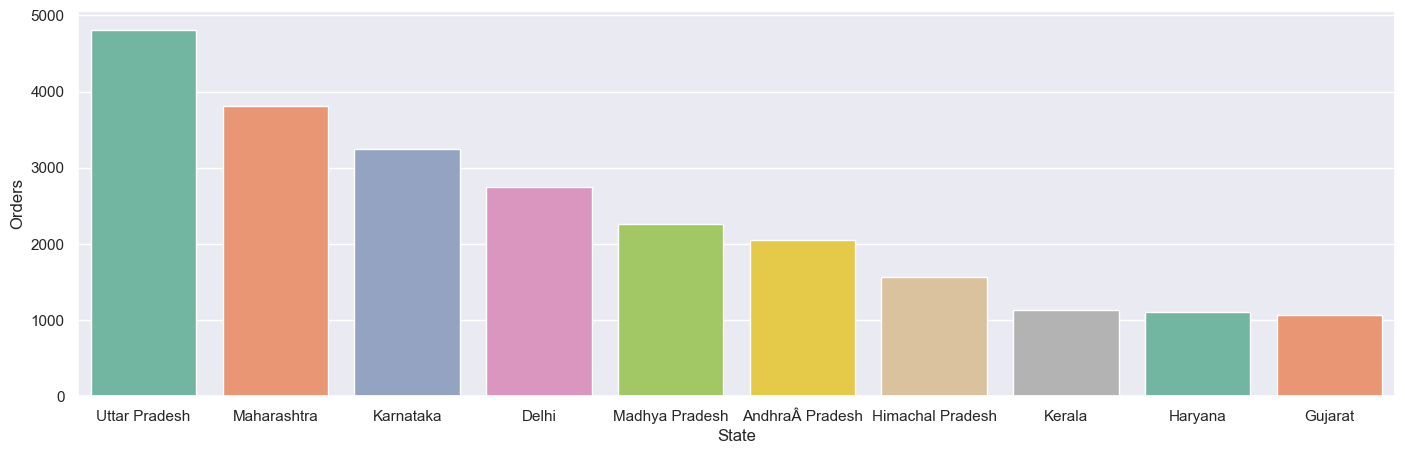

In [22]:
#  Total number of orders from top 10 states 
sales_state = df.groupby(['State'],as_index= False)['Orders'].sum().sort_values(by= 'Orders' ,ascending= False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x = 'State', y= 'Orders', data= sales_state, hue='State',palette='Set2')
plt.show()

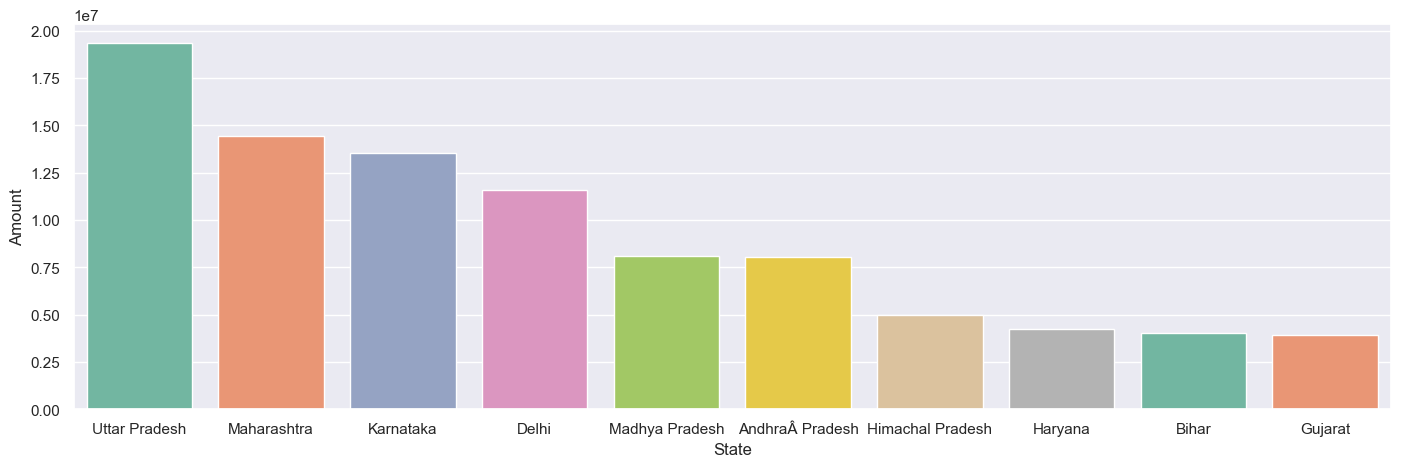

In [23]:
#  Total Amount/Sales from top 10 states 
sales_state = df.groupby(['State'],as_index= False)['Amount'].sum().sort_values(by= 'Amount' ,ascending= False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x = 'State', y= 'Amount', data= sales_state, hue='State',palette='Set2')
plt.show()

#### From the above graph we can say that most of orders and sales amount are fron utter pradesh, maharashtra and karnataka respectively

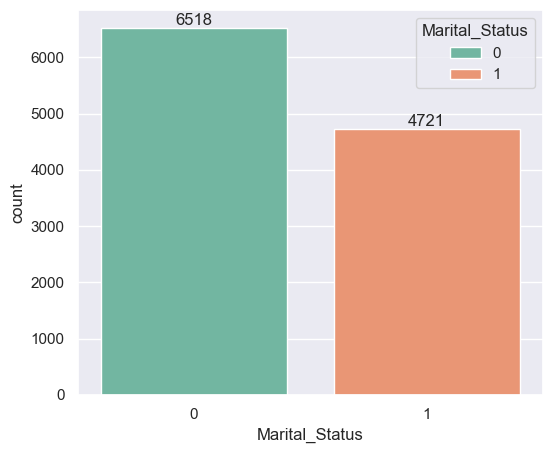

In [38]:
ax = sns.countplot(data = df, x= 'Marital_Status',hue= 'Marital_Status',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(9,5)})
plt.show()

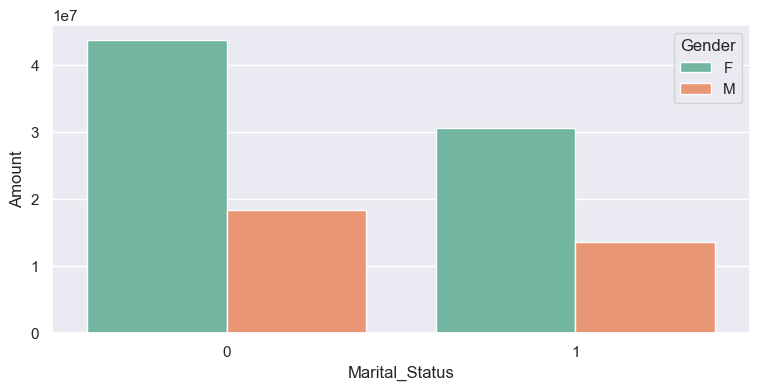

In [40]:
sales_state = df.groupby(['Marital_Status','Gender'],as_index= False)['Amount'].sum().sort_values(by= 'Amount' ,ascending= False).head(10)
sns.set(rc={'figure.figsize':(9,4)})
sns.barplot(x = 'Marital_Status', y= 'Amount', data= sales_state, hue='Gender',palette='Set2')
plt.show()

#### From the above graph we can say that most of the buyers are married(female) and they have high purchasing power

## Occupation

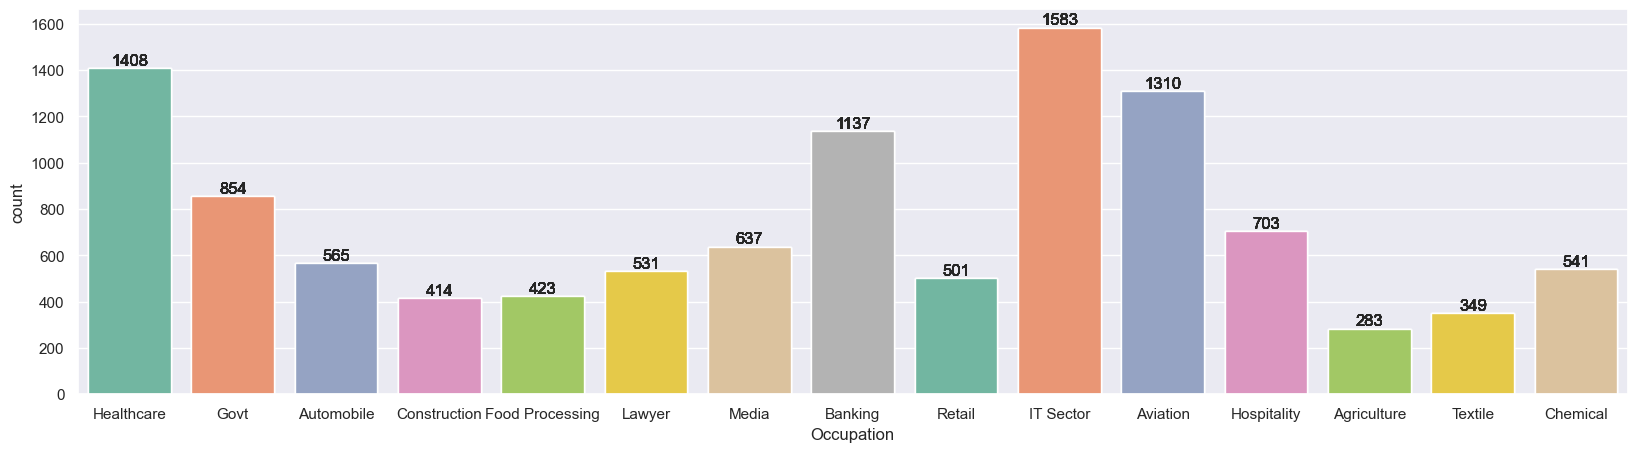

In [46]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data= df, x= 'Occupation',hue= 'Occupation',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

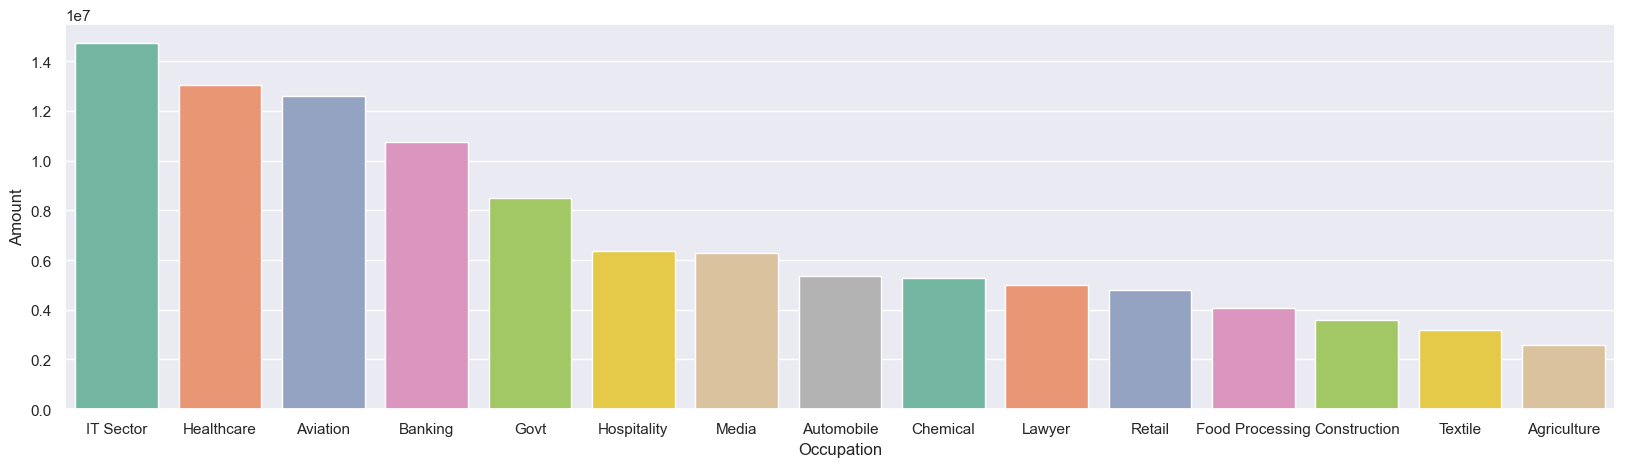

In [49]:
sales_occu = df.groupby(['Occupation'],as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Occupation', y= 'Amount', data= sales_occu, hue='Occupation',palette='Set2')
plt.show()

#### From the above graph we can say that most of the buyers are from it sector, healthcare and aviation

## Product Category

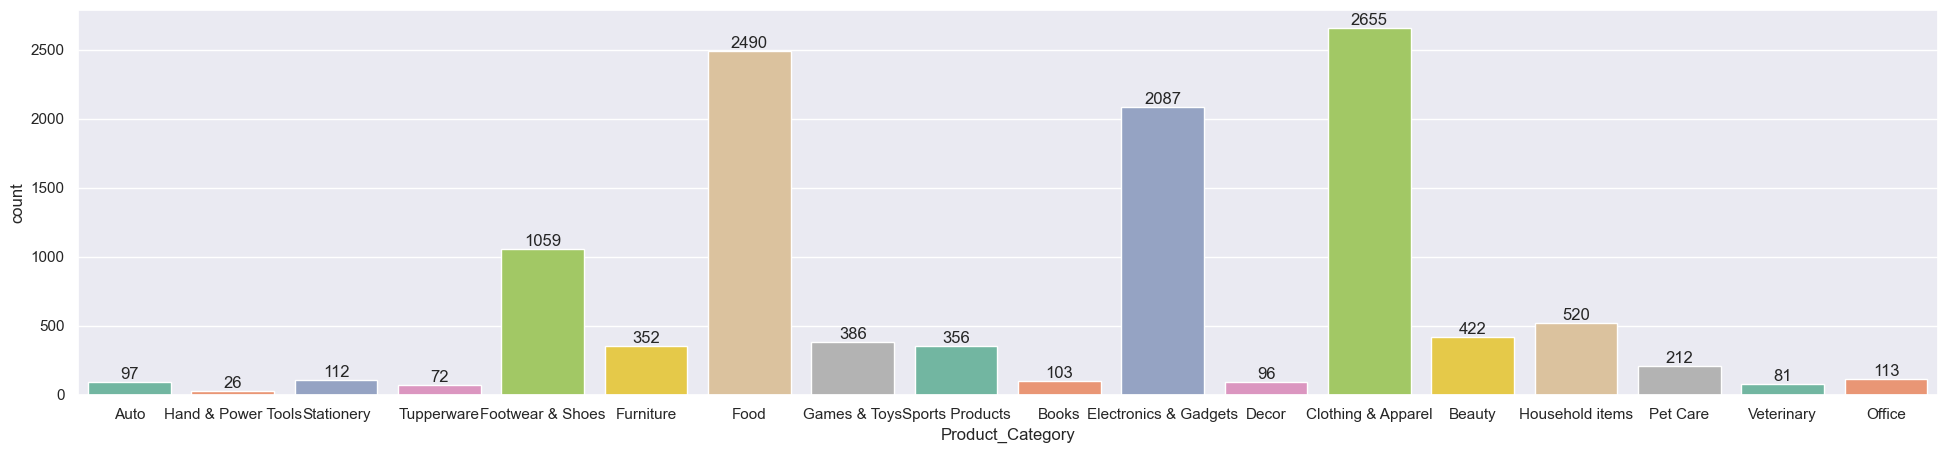

In [51]:
sns.set(rc={'figure.figsize':(24,5)})
ax= sns.countplot(data= df, x= 'Product_Category',hue= 'Product_Category',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

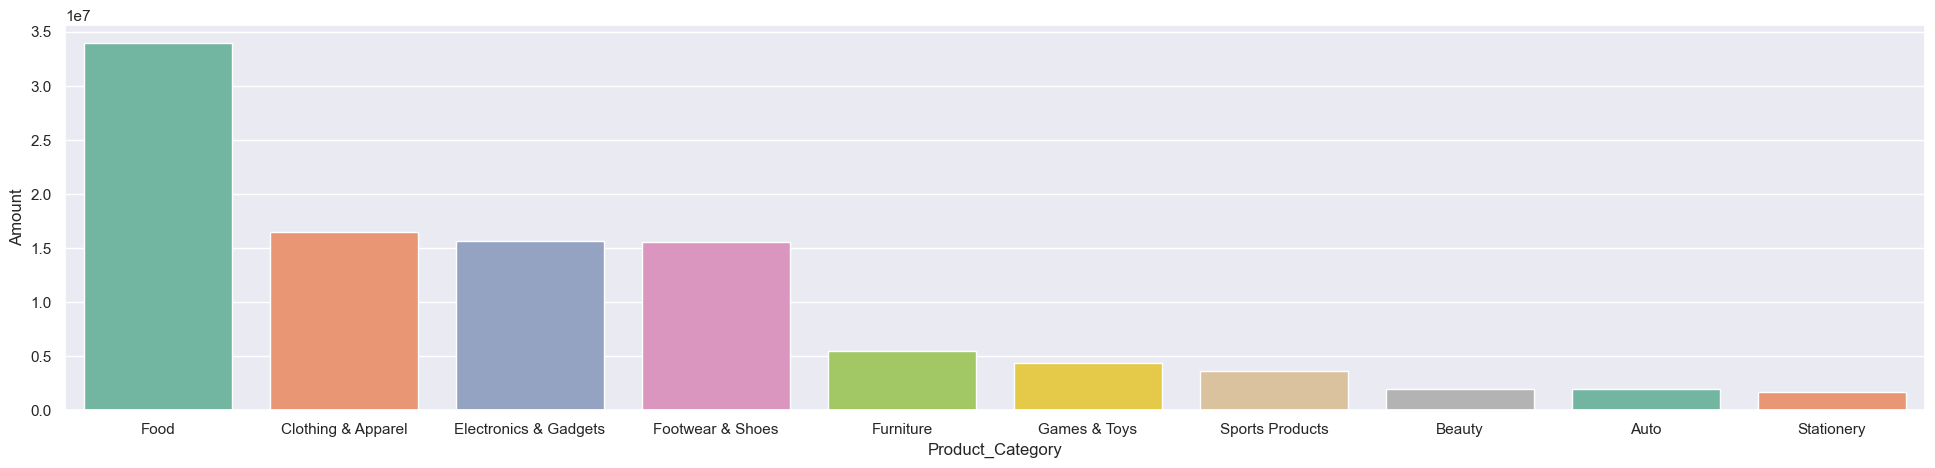

In [58]:
sales_product = df.groupby(['Product_Category'],as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(24,5)})
sns.barplot(x = 'Product_Category', y= 'Amount', data= sales_product, hue='Product_Category',palette='Set2')
plt.show()

#### From the above graph we can say that most of the sold products are food,clothing and electronics categories

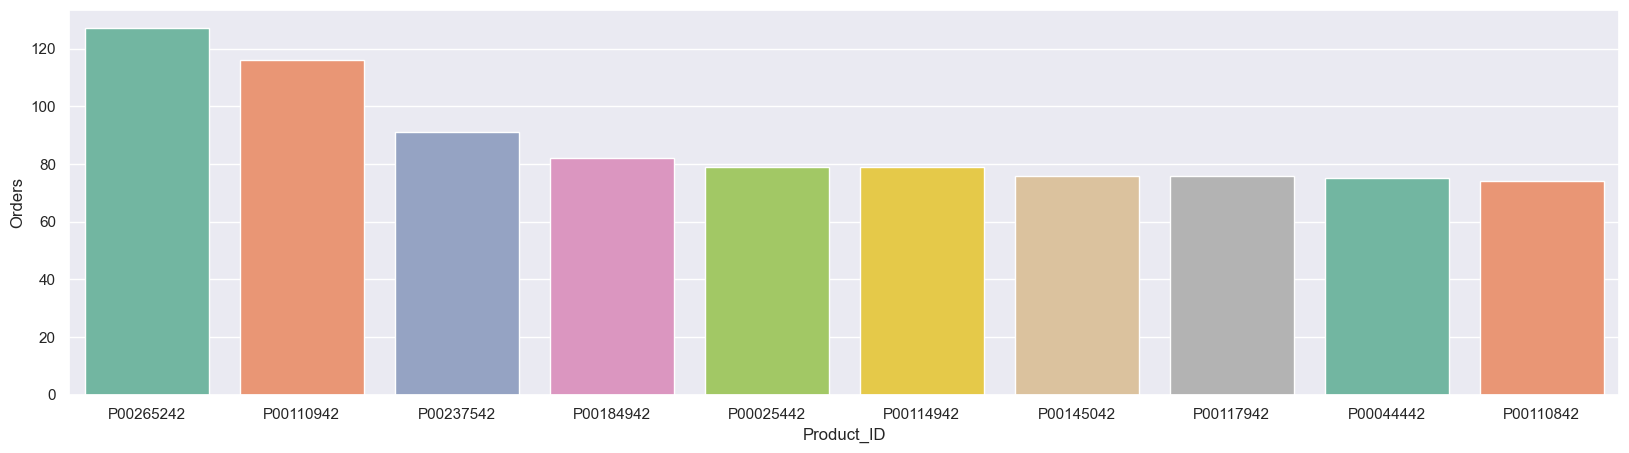

In [62]:
# Top 10 product most sold product

sales_product = df.groupby(['Product_ID'],as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_ID', y= 'Orders', data= sales_product, hue='Product_ID',palette='Set2')
plt.show()

# conclusion:

### Married female age group of 26-35 from up, maharashtra, karnataka working in It, healthcare and aviation are most likely to buy products like food,clothes and electronics category.

### Thank You!